In [146]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_merge = pd.merge(ride_data, city_data, on=["city", "city"], how="left")
pyber_merge_df = pd.DataFrame(pyber_merge)

pyber_merge["fare"] = pd.to_numeric(pyber_merge["fare"])

reduced_merge = pyber_merge[["city", "driver_count", "type", "fare", "ride_id"]]

# Display the data table for preview
reduced_merge.head()


,city,driver_count,type,fare,ride_id
0,Lake Jonathanshire,5,Urban,13.83,5739410935873
1,South Michelleport,72,Urban,30.24,2343912425577
2,Port Samanthamouth,57,Urban,33.44,2005065760003
3,Rodneyfort,34,Urban,23.44,5149245426178
4,South Jack,46,Urban,34.58,3908451377344


In [147]:
urban_df = reduced_merge.loc[reduced_merge["type"] == "Urban", :]
urban_df.head()

,city,driver_count,type,fare,ride_id
0,Lake Jonathanshire,5,Urban,13.83,5739410935873
1,South Michelleport,72,Urban,30.24,2343912425577
2,Port Samanthamouth,57,Urban,33.44,2005065760003
3,Rodneyfort,34,Urban,23.44,5149245426178
4,South Jack,46,Urban,34.58,3908451377344


## Bubble Plot of Ride Sharing Data

Text(58, 35, 'Note: Circle size correlates with driver count per city')

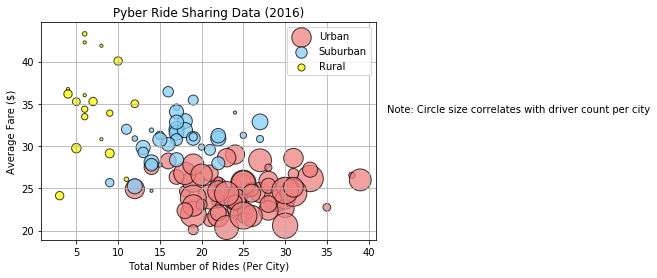

In [199]:
# # Obtain the x and y coordinates for each of the three city types
urban_df = reduced_merge.loc[reduced_merge["type"] == "Urban", :]
urban_ride_count = urban_df.groupby(["city"]).count()["ride_id"]
urban_fares = urban_df.groupby(["city"])["fare"].sum()/urban_ride_count
urban_drivers = urban_df.groupby(["city"])["driver_count"].mean()

suburban_df = reduced_merge.loc[reduced_merge["type"] == "Suburban", :]
suburban_ride_count = suburban_df.groupby(["city"]).count()["ride_id"]
suburban_fares = suburban_df.groupby(["city"])["fare"].sum()/suburban_ride_count
suburban_drivers = suburban_df.groupby(["city"])["driver_count"].mean()

rural_df = reduced_merge.loc[reduced_merge["type"] == "Rural", :]
rural_ride_count = rural_df.groupby(["city"])["ride_id"].count()
rural_fares = rural_df.groupby(["city"])["fare"].sum()/rural_ride_count
rural_drivers = rural_df.groupby(["city"])["driver_count"].mean()

# # Build the scatter plots for each city types
plt.scatter(urban_ride_count, urban_fares, marker="o", s=urban_drivers*10, facecolors="lightcoral", edgecolors="black", alpha=0.75, label="Urban")
plt.scatter(suburban_ride_count, suburban_fares, marker="o", s=suburban_drivers*10, facecolors="lightskyblue", edgecolors="black", alpha=0.75, label="Suburban")
plt.scatter(rural_ride_count, rural_fares, marker="o", s=rural_drivers*10, facecolors="yellow", edgecolors="black", alpha=0.75, label="Rural")

# # Incorporate the other graph properties
plt.grid(True)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# # Create a legend
plt.legend(loc="best")

# # Incorporate a text label regarding circle size
plt.text(58,35, "Note: Circle size correlates with driver count per city", ha="center", va="top")

# # Save Figure
plt.savefig("../Images/ride_sharing_bubble_plot.png")

In [141]:
# Show plot
plt.show()

## Total Fares by City Type

<function matplotlib.pyplot.show(*args, **kw)>

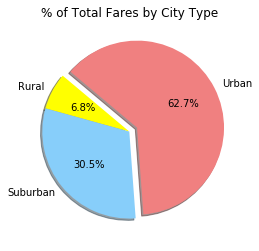

In [157]:
# Calculate Type Percents
city_type_fare = pyber_merge.groupby(["type"])["fare"].sum()
explode = (0, 0, 0.1)
colors = ["yellow", "lightskyblue", "lightcoral"]
labels = ["Rural", "Suburban", "Urban"]

#Build Pie Chart
plt.title("% of Total Fares by City Type")
plt.pie(city_type_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.savefig("../Images/total_fares_by_city_type.png")
plt.show

In [87]:
# Show Figure
plt.show()

## Total Rides by City Type

([<matplotlib.patches.Wedge at 0x18610583128>,
 [Text(-0.9475355551847633, 0.5587274574071894, 'Rural'),
  Text(-0.9860007094711902, -0.48765008040839053, 'Suburban'),
  Text(1.148528168888804, 0.3476823913702436, 'Urban')],
 [Text(-0.5168375755553254, 0.3047604313130124, '5.3%'),
  Text(-0.5378185688024674, -0.26599095295003117, '26.3%'),
  Text(0.6699747651851355, 0.20281472829930874, '68.4%')])

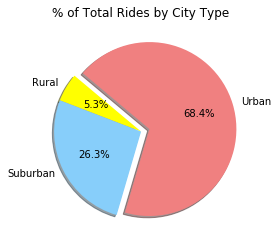

In [156]:
# Calculate Ride Percents
city_type_fare = pyber_merge.groupby(["type"])["fare"].count()
explode = (0, 0, 0.1)
colors = ["yellow", "lightskyblue", "lightcoral"]
labels = ["Rural", "Suburban", "Urban"]

#Build Pie Chart
plt.title("% of Total Rides by City Type")
plt.pie(city_type_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.savefig("../Images/total_rides_by_city_type.png")

In [71]:
# Show Figure
plt.show()

## Total Drivers by City Type

([<matplotlib.patches.Wedge at 0x18611618a58>,
 [Text(-0.8980009228297813, 0.6352907543769716, 'Rural'),
  Text(-1.0998678923138117, 0.017047564552569536, 'Suburban'),
  Text(1.1942514119628478, -0.11731822119664388, 'Urban')],
 [Text(-0.4898186851798806, 0.34652222966016627, '2.6%'),
  Text(-0.5999279412620789, 0.009298671574128836, '16.5%'),
  Text(0.6966466569783278, -0.0684356290313756, '80.9%')])

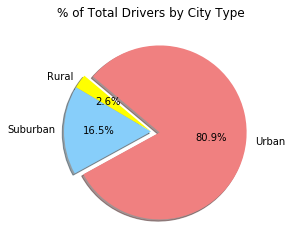

In [158]:
# Calculate Type Percents
drivers_by_city = city_data.groupby(["type"])["driver_count"].sum()
explode = (0, 0, 0.1)
colors = ["yellow", "lightskyblue", "lightcoral"]
labels = ["Rural", "Suburban", "Urban"]

#Build Pie Charts
plt.title("% of Total Drivers by City Type")
plt.pie(drivers_by_city, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.savefig("../Images/total_drivers_by_city_type.png")

In [73]:
# Show Figure
plt.show()